In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/first inten project.csv')

In [ ]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors = 'coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36285 non-null  object        
 1   number of adults          36285 non-null  int64         
 2   number of children        36285 non-null  int64         
 3   number of weekend nights  36285 non-null  int64         
 4   number of week nights     36285 non-null  int64         
 5   type of meal              36285 non-null  object        
 6   car parking space         36285 non-null  int64         
 7   room type                 36285 non-null  object        
 8   lead time                 36285 non-null  int64         
 9   market segment type       36285 non-null  object        
 10  repeated                  36285 non-null  int64         
 11  P-C                       36285 non-null  int64         
 12  P-not-C           

In [ ]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,date of reservation
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36248
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733,2018-05-24 15:28:31.410284544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-10-02 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262,NaN


In [ ]:
df_sorted = df.sort_values(by = 'date of reservation')
df_sorted.drop('Booking_ID', axis = 1, inplace = True)
df_sorted.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.0,0,2015-10-02,Not_Canceled
5,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.0,1,2016-09-13,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.0,1,2017-05-20,Canceled
5455,2,0,0,4,Meal Plan 1,0,Room_Type 1,88,Online,0,0,0,76.5,1,2017-07-01,Canceled
13727,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,Offline,0,0,0,101.5,0,2017-07-01,Canceled


In [ ]:
df_sorted['type of meal'].unique()

array(['Meal Plan 1', 'Meal Plan 2', 'Not Selected', 'Meal Plan 3'],
      dtype=object)

In [ ]:
df_sorted['type of meal'] = df_sorted['type of meal'].str.replace("Meal Plan ", "")
df_sorted['type of meal'] = df_sorted['type of meal'].str.replace("Not Selected", "0")
df_sorted['type of meal'] = df_sorted['type of meal'].astype(int)
df_sorted['type of meal'].unique()

array([1, 2, 0, 3])

In [ ]:
df_sorted['room type'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 5',
       'Room_Type 6', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [ ]:
df_sorted['room type'] = df_sorted['room type'].str.replace("Room_Type ", "")
df_sorted['room type'] = df_sorted['room type'].astype(int)
df_sorted['room type'].unique()

array([1, 4, 2, 5, 6, 7, 3])

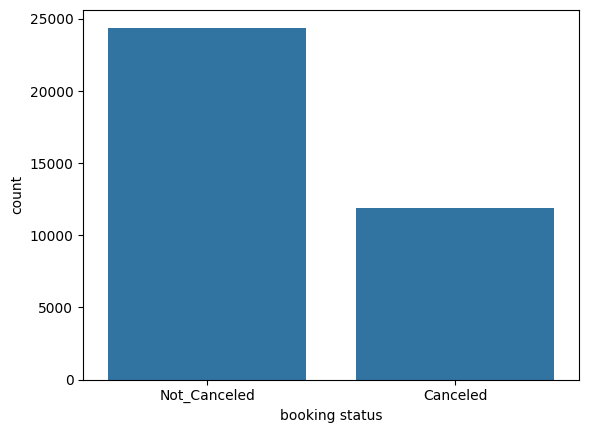

In [ ]:
sns.countplot(data = df_sorted, x = 'booking status')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Label Count Plot')
plt.show()

In [ ]:
df_sorted['booking status'] = df_sorted['booking status'].str.replace("Not_Canceled", "0")
df_sorted['booking status'] = df_sorted['booking status'].str.replace("Canceled", "1")
df_sorted['booking status'] = df_sorted['booking status'].astype(int)
df_sorted['booking status'].unique()

array([0, 1])

In [ ]:
df_sorted['num_of_individuals'] = df_sorted['number of adults'] + df_sorted['number of children']
df_sorted['num_of_individuals'].head()

,num_of_individuals
0,2
5,1
3,1
5455,2
13727,2


In [ ]:
df_sorted['month'] = df['date of reservation'].dt.month
df_sorted['year'] = df['date of reservation'].dt.year
df_sorted['day'] = df['date of reservation'].dt.day
# df_sorted['no_of_years_since'] = df_sorted['year'] - df_sorted['year'].min()
df_sorted.drop(['date of reservation'], axis = 1, inplace = True)
df_sorted

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,num_of_individuals,month,year,day
0,1,1,2,5,1,0,1,224,Offline,0,0,0,88.0,0,0,2,10.0,2015.0,2.0
5,1,0,0,2,2,0,1,346,Offline,0,0,0,100.0,1,1,1,9.0,2016.0,13.0
3,1,0,0,2,1,0,1,211,Online,0,0,0,100.0,1,1,1,5.0,2017.0,20.0
5455,2,0,0,4,1,0,1,88,Online,0,0,0,76.5,1,1,2,7.0,2017.0,1.0
13727,2,0,0,2,2,0,1,257,Offline,0,0,0,101.5,0,1,2,7.0,2017.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30632,3,0,1,2,2,0,4,7,Online,0,0,0,193.0,2,0,3,NaN,NaN,NaN
30839,1,0,1,2,1,0,1,117,Offline,0,0,0,76.0,0,0,1,NaN,NaN,NaN
32041,2,0,1,0,0,0,1,50,Online,0,0,0,76.5,0,1,2,NaN,NaN,NaN
34638,1,0,1,2,1,0,1,3,Corporate,1,0,1,66.0,0,0,1,NaN,NaN,NaN


In [ ]:
df_sorted.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price ', 'special requests', 'booking status',
       'num_of_individuals', 'month', 'year', 'day'],
      dtype='object')

In [ ]:
monthly_counts = df_sorted.groupby(['month', 'booking status']).size().reset_index(name = 'count')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

In [ ]:
# plt.figure(figsize = (10, 8))
# sns.lineplot(data = monthly_counts, x = 'month', y = 'count', hue = 'booking status')
# # plt.xticks(ticks = range(12), labels = month_order)
# # plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Label Line Plot')
# plt.show()

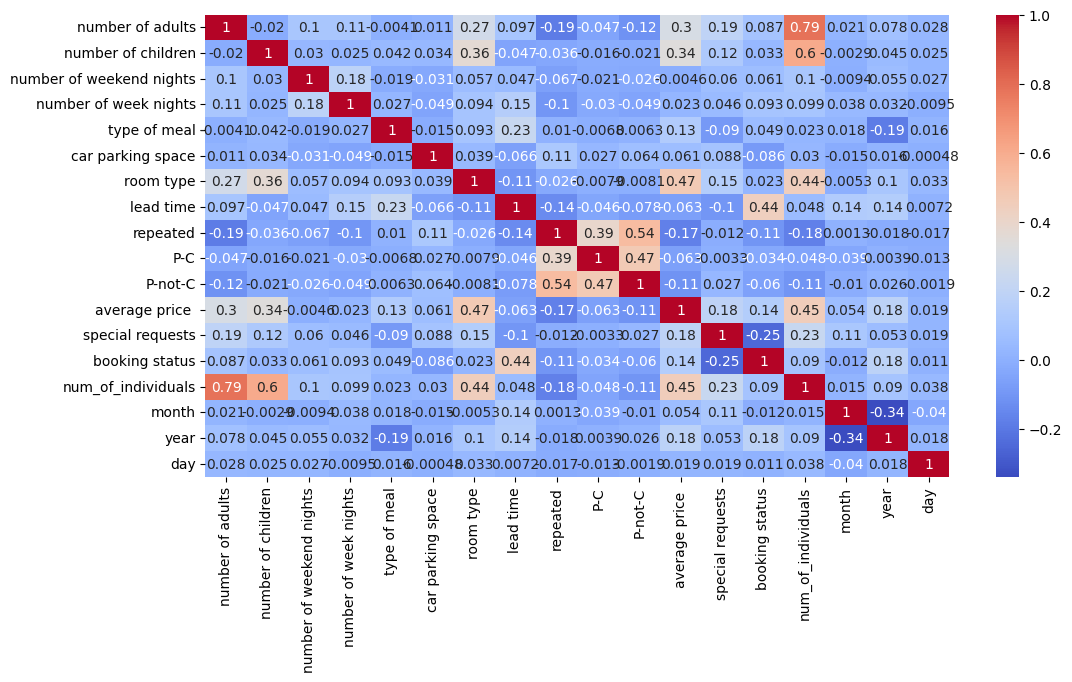

In [ ]:
plt.figure(figsize = (12, 6))
sns.heatmap(df_sorted.corr(numeric_only  = True), annot = True, cmap = 'coolwarm')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Heat Map')
plt.show()

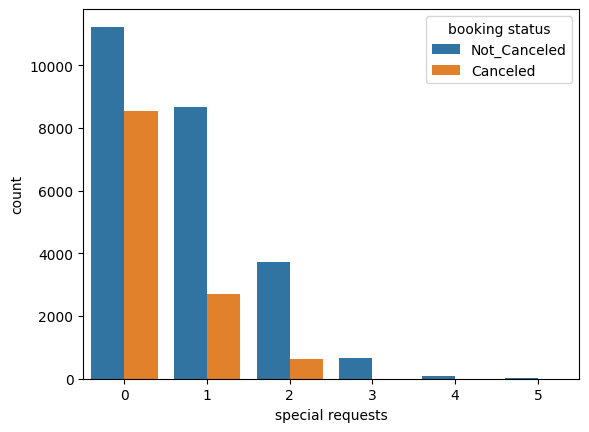

In [ ]:
sns.countplot(data = df_sorted, x = 'special requests', hue = df['booking status'])
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Special Request and Label Count Plot')
plt.show()

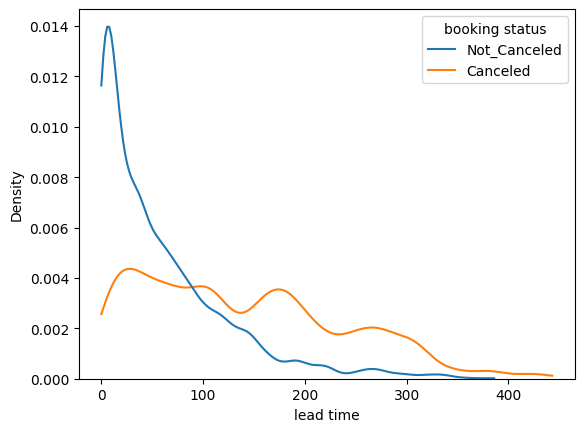

In [ ]:
sns.kdeplot(data = df_sorted, x = 'lead time', hue = df['booking status'], cut = 0, common_norm = False)
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Lead Time and Label KDE')
plt.show()

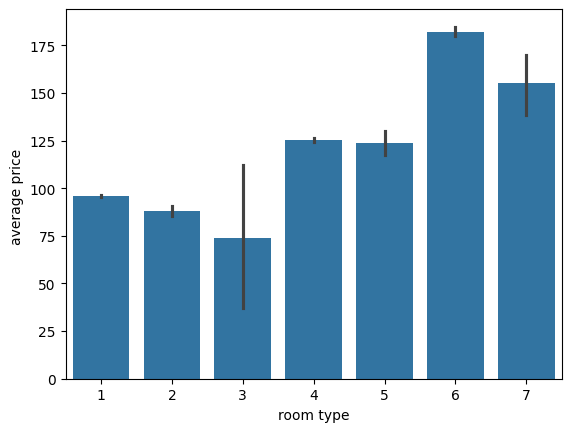

In [ ]:
sns.barplot(data = df_sorted, x = 'room type', y = 'average price ')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Average Price and Room Type Bar Plot')
plt.show()

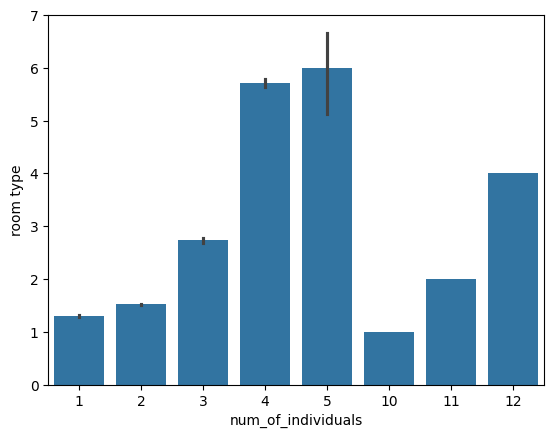

In [ ]:
sns.barplot(data = df_sorted, x = 'num_of_individuals', y = 'room type')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Number of Individuals and Room Type Bar Plot')
plt.show()

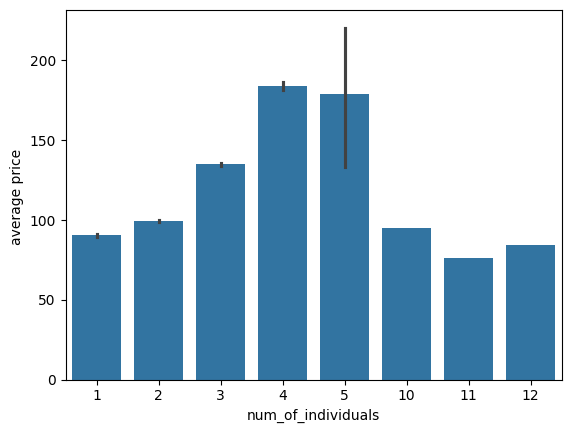

In [ ]:
sns.barplot(data = df_sorted, x = 'num_of_individuals', y = 'average price ')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Bar Plot for Average Price and Number of Individuals')
plt.show()

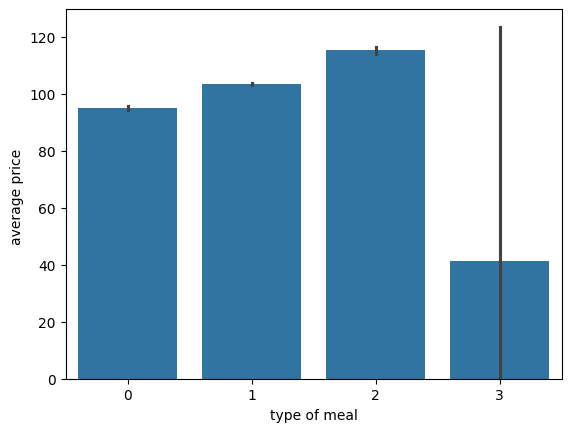

In [ ]:
sns.barplot(data = df_sorted, x = 'type of meal', y = 'average price ')
plt.show()

In [ ]:
df_sorted['type of meal'].unique()

array([1, 2, 0, 3])

In [ ]:
pd.crosstab(df_sorted['num_of_individuals'], df_sorted['room type'])

room type,1,2,3,4,5,6,7
num_of_individuals,,,,,,,
1,6851,18,3,556,98,16,14
2,19537,598,4,3573,117,73,44
3,1730,27,0,1914,36,117,29
4,19,46,0,15,14,755,63
5,0,2,0,0,0,5,8
10,1,0,0,0,0,0,0
11,0,1,0,0,0,0,0
12,0,0,0,1,0,0,0


In [ ]:
df_sorted[['P-C', 'P-not-C']].value_counts()

P-C  P-not-C
0    0          35355
     1            209
1    0            113
0    2            101
     3             66
                ...  
5    57             1
11   19             1
     16             1
     21             1
     20             1
Name: count, Length: 147, dtype: int64

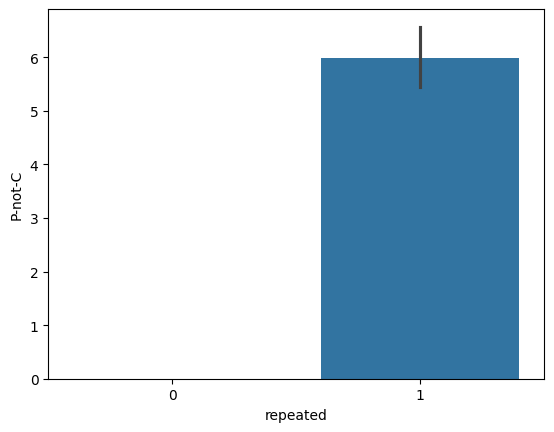

In [ ]:
sns.barplot(data = df_sorted, x = 'repeated', y = 'P-not-C')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/P-C and Repeated Bar Plot')
plt.show()

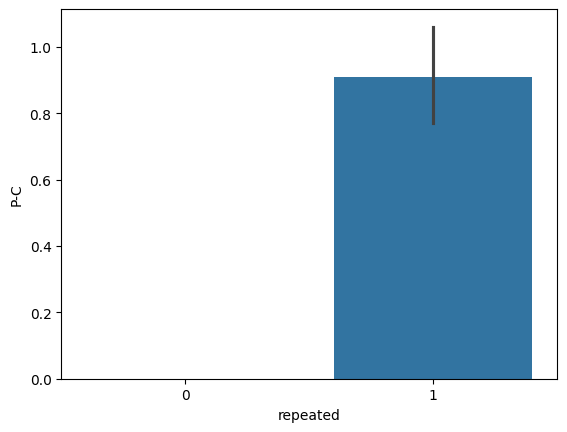

In [ ]:
sns.barplot(data = df_sorted, x = 'repeated', y = 'P-C')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/P-not-C and Repeated Bar Plot')
plt.show()

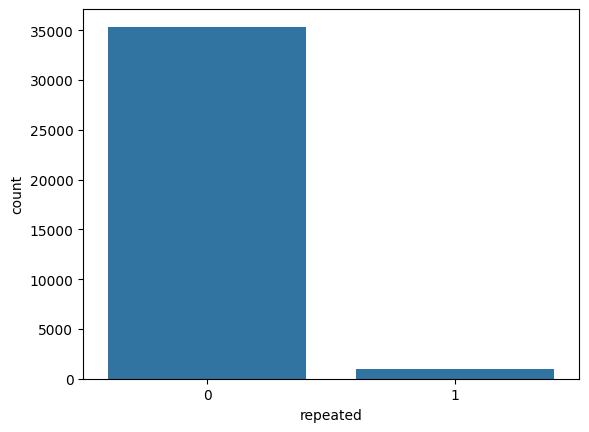

In [ ]:
sns.countplot(data = df_sorted, x = 'repeated')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Repeated Count Plot')
plt.show()

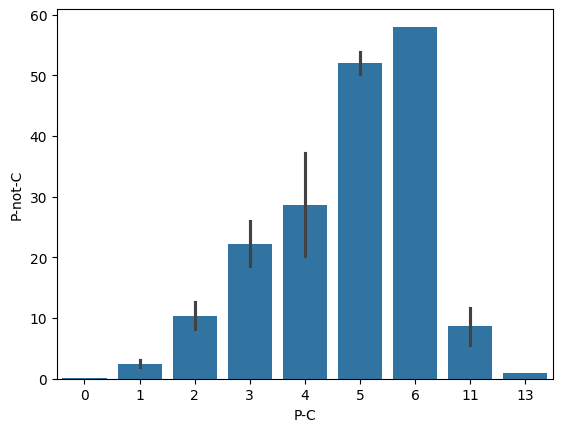

In [ ]:
sns.barplot(data = df_sorted, x = 'P-C', y = 'P-not-C')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/P-C and P-not-C Bar Plot')
plt.show()

In [ ]:
# pd.crosstab(df_sorted['special requests'], df['booking status'])

In [ ]:
pd.crosstab(df_sorted['market segment type'], df['booking status'])

booking status,Canceled,Not_Canceled
market segment type,,
Aviation,37,88
Complementary,0,391
Corporate,220,1797
Offline,3154,7377
Online,8478,14743


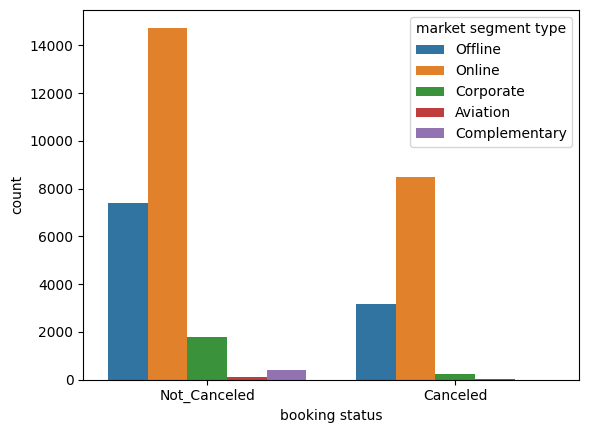

In [ ]:
sns.countplot(data = df_sorted, x = df['booking status'], hue = 'market segment type')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Market Segment Type and Label Count Plot')
plt.show()

In [ ]:
df_sorted.dropna(inplace = True)

In [ ]:
print("Number of duplicates before: ",  df_sorted.duplicated().sum())
df_sorted.drop_duplicates(inplace = True)
print("Number of duplicates after: ", df_sorted.duplicated().sum())

Number of duplicates before:  10274
Number of duplicates after:  0


In [ ]:
features = df_sorted.drop(columns = ['number of adults', 'number of children', 'booking status'], axis = 1)
target = df_sorted['booking status']

In [ ]:
numerical_features = df_sorted[['lead time', 'average price ', 'P-C', 'P-not-C', 'num_of_individuals',
                                'number of week nights', 'number of weekend nights', 'special requests']].columns
categorical_features = df_sorted[['type of meal', 'car parking space', 'room type', 'market segment type', 'repeated', ]].columns

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42, shuffle  = False)

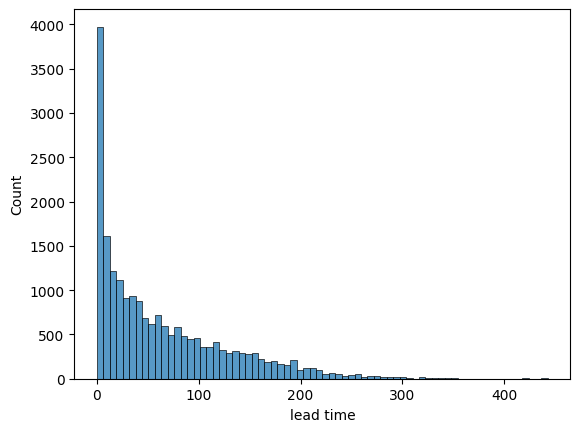

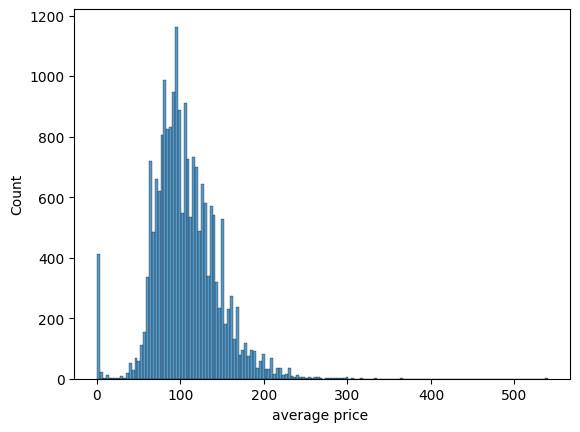

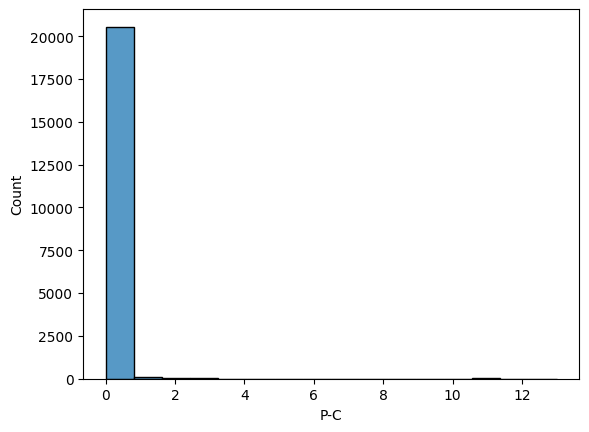

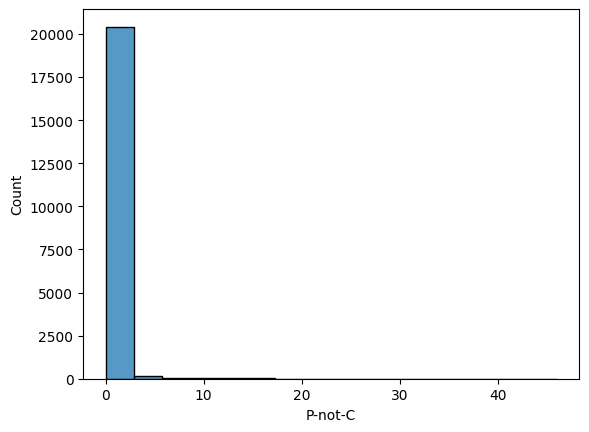

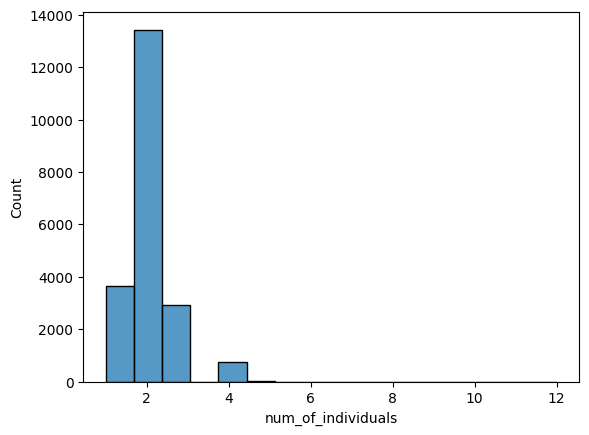

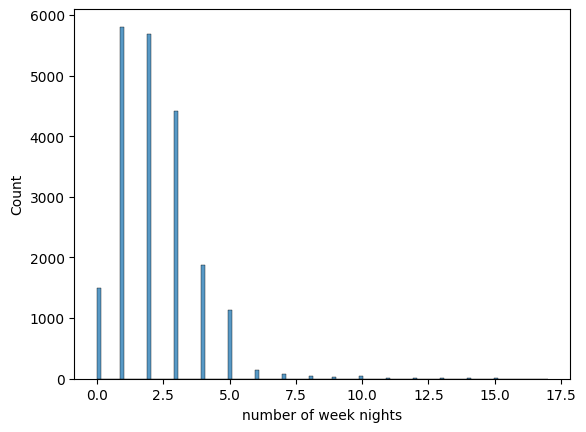

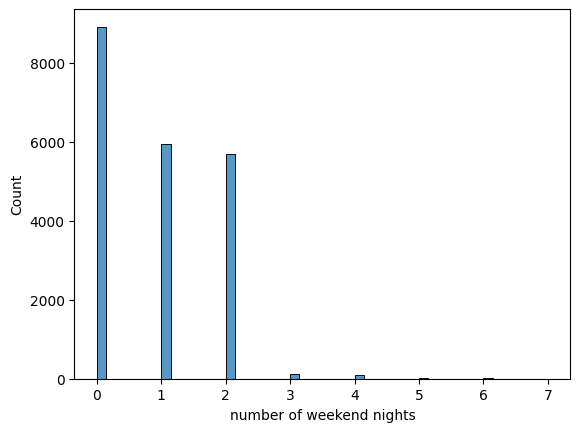

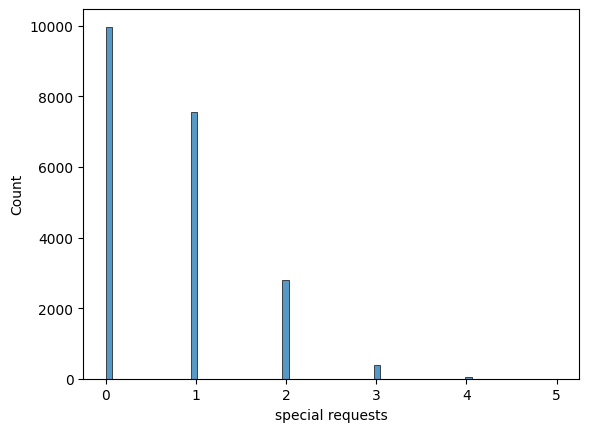

In [ ]:
for column in numerical_features:
  sns.histplot(x_train[column])
  # if column in ('lead time','average price '):
  #   plt.savefig(f"/content/drive/MyDrive/Colab Notebooks /Internship/First Project/{column} Histogram")
  plt.show()

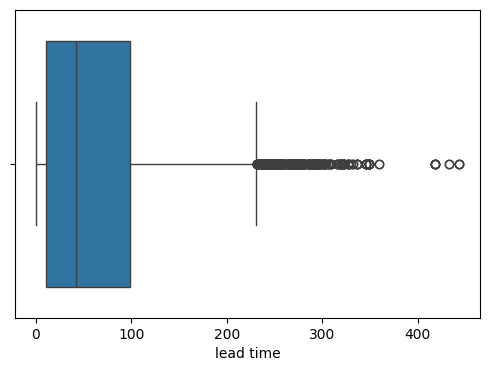

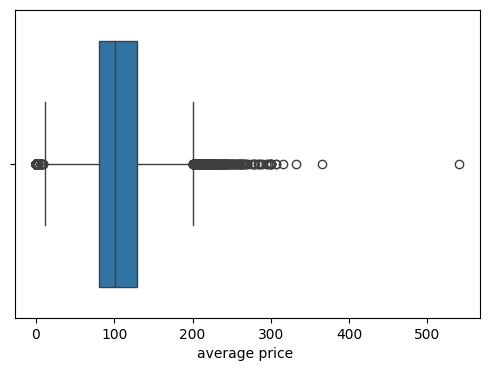

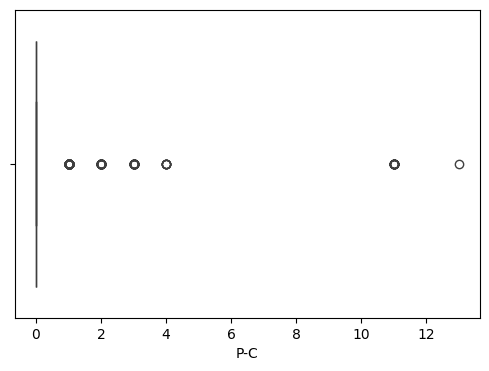

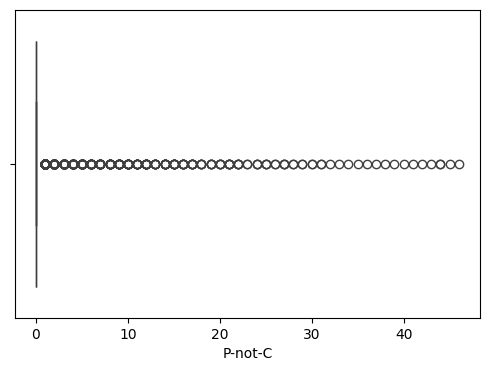

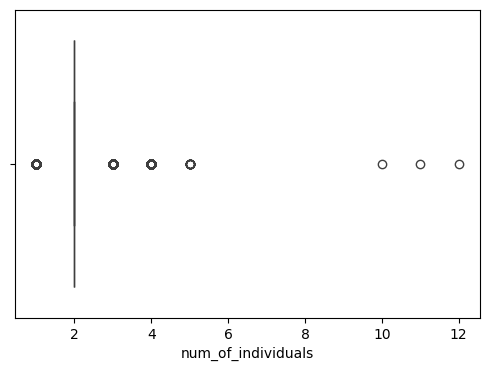

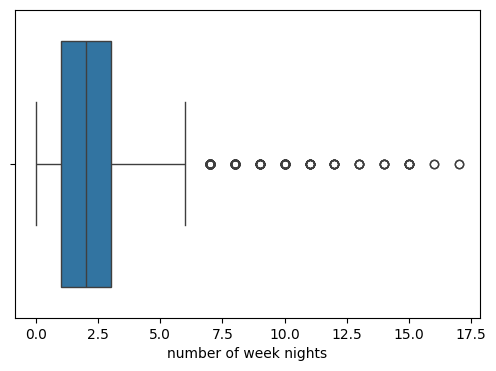

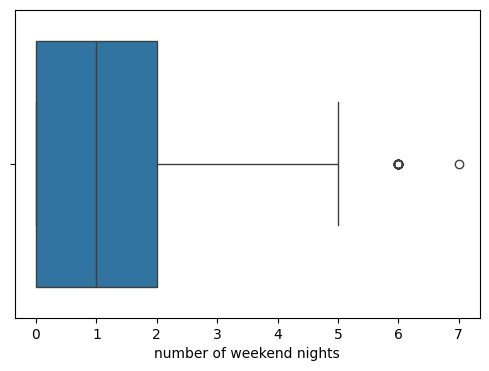

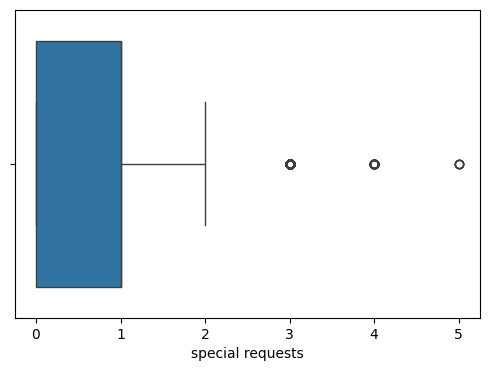

In [ ]:
for column in numerical_features:
  plt.figure(figsize = (6, 4))
  sns.boxplot(x = x_train[column])
  # if column in ('lead time', 'average price '):
    # plt.savefig(f"/content/drive/MyDrive/Colab Notebooks /Internship/First Project/{column} Box Plot")
  plt.show()
  print('\n')

In [ ]:
onehot_encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
x_train_encoded = x_train.copy()
x_test_encoded = x_test.copy()

ohe_array_train = onehot_encoder.fit_transform(x_train[['market segment type']])
ohe_columns_train = pd.DataFrame(
    ohe_array_train,
    columns = onehot_encoder.get_feature_names_out(x_train[['market segment type']].columns),
    index = x_train.index
)
x_train_encoded = pd.concat([x_train.drop(columns = 'market segment type'), ohe_columns_train], axis = 1)

ohe_array_test = onehot_encoder.transform(x_test[['market segment type']])
ohe_columns_test = pd.DataFrame(
    ohe_array_test,
    columns = onehot_encoder.get_feature_names_out(x_test[['market segment type']].columns),
    index = x_test.index
)

x_test_encoded = pd.concat([x_test.drop(columns = 'market segment type'), ohe_columns_test], axis = 1)

x_train_encoded

,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,repeated,P-C,P-not-C,average price,special requests,num_of_individuals,month,year,day,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,2,5,1,0,1,224,0,0,0,88.0,0,2,10.0,2015.0,2.0,0.0,0.0,0.0,1.0,0.0
5,0,2,2,0,1,346,0,0,0,100.0,1,1,9.0,2016.0,13.0,0.0,0.0,0.0,1.0,0.0
3,0,2,1,0,1,211,0,0,0,100.0,1,1,5.0,2017.0,20.0,0.0,0.0,0.0,0.0,1.0
5455,0,4,1,0,1,88,0,0,0,76.5,1,2,7.0,2017.0,1.0,0.0,0.0,0.0,0.0,1.0
13727,0,2,2,0,1,257,0,0,0,101.5,0,2,7.0,2017.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24624,1,2,1,0,1,187,0,0,0,108.9,3,1,10.0,2018.0,7.0,0.0,0.0,0.0,0.0,1.0
26718,1,2,1,0,1,96,0,0,0,118.8,1,2,10.0,2018.0,7.0,0.0,0.0,0.0,0.0,1.0
17273,0,2,2,0,1,211,0,0,0,143.1,1,2,10.0,2018.0,7.0,0.0,0.0,0.0,0.0,1.0
24620,1,2,1,0,1,88,0,0,0,68.0,0,1,10.0,2018.0,7.0,0.0,0.0,1.0,0.0,0.0


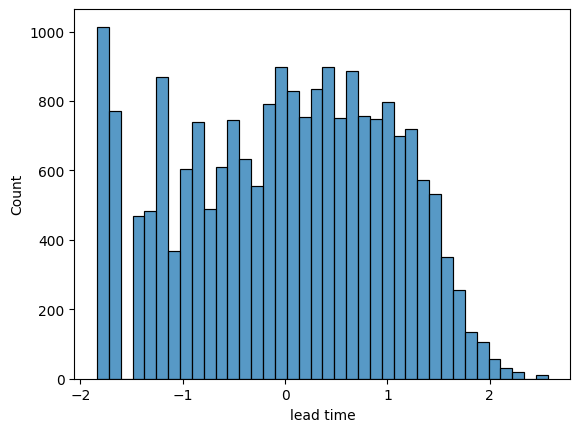

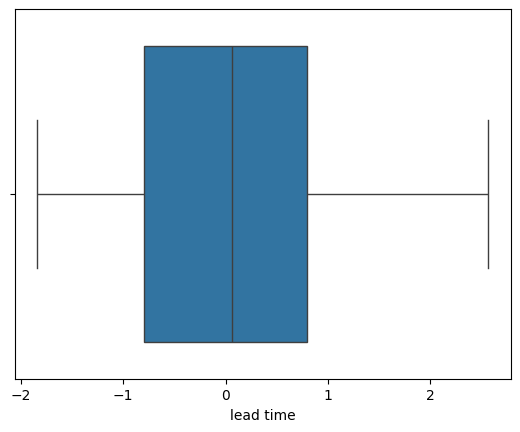

In [ ]:
power_transformer = PowerTransformer()
robust_scaler = RobustScaler()

x_train_scaled = x_train_encoded.copy()
x_test_scaled = x_test_encoded.copy()

x_train_scaled['lead time'] = power_transformer.fit_transform(x_train_encoded[['lead time']])
x_test_scaled['lead time'] = power_transformer.transform(x_test_encoded[['lead time']])
# x_train_scaled['lead_time'] = robust_scaler.fit_transform(x_train_scaled[['lead_time']])
sns.histplot(x_train_scaled['lead time'])
# plt.savefig("/content/drive/MyDrive/Colab Notebooks /Internship/First Project/lead time Histogram after log transformation")
plt.show()
sns.boxplot(x = x_train_scaled['lead time'])
# plt.savefig("/content/drive/MyDrive/Colab Notebooks /Internship/First Project/lead time box plot after log transformation")
plt.show()

In [ ]:
#Removing outliers in average price and lead time
multiplying_factor = 1.5
Q1 = x_train['average price '].quantile(0.02)
Q3 = x_train['average price '].quantile(0.99)
IQR = Q3 - Q1
lower_bound = Q1 - (multiplying_factor * IQR)
upper_bound = Q3 + (multiplying_factor * IQR)
is_lower = x_train[column] < lower_bound
is_higher = x_train[column] > upper_bound
outliers = x_train[is_lower | is_higher]

print(f"No. of values in the feature: {len(x_train['average price '])} \nNo. of outliers: {len(outliers)}")

No. of values in the feature: 20779 
No. of outliers: 0


In [ ]:
lower_bound_for_trimming = x_train_scaled['average price '].quantile(0.02)
upper_bound_for_trimming = x_train_scaled['average price '].quantile(0.99)
print("Values for trimming: ", lower_bound_for_trimming, ", ", upper_bound_for_trimming)

Values for trimming:  6.0 ,  216.0


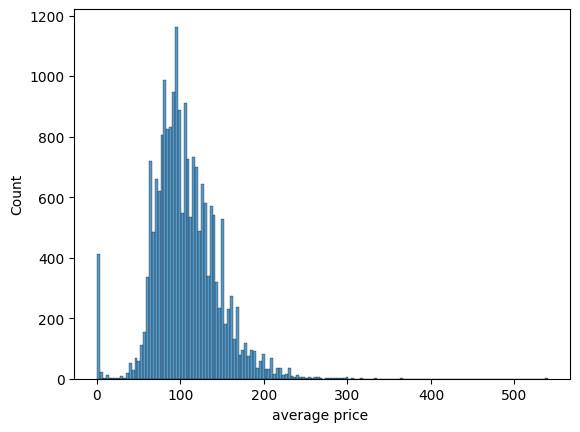

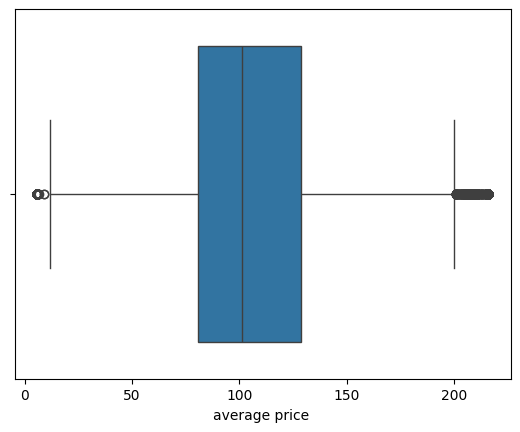

In [ ]:
x_train_scaled['average price '] = x_train['average price '].clip(lower = lower_bound_for_trimming, upper = upper_bound_for_trimming)
x_test_scaled['average price '] = x_test['average price '].clip(lower = lower_bound_for_trimming, upper = upper_bound_for_trimming)
sns.histplot(x = x_train['average price '])
plt.show()
sns.boxplot(x = x_train_scaled['average price '])
plt.show()

In [ ]:
# print(x_train_scaled.isnull().sum(),'\n\n\n', x_test_scaled.isnull().sum())

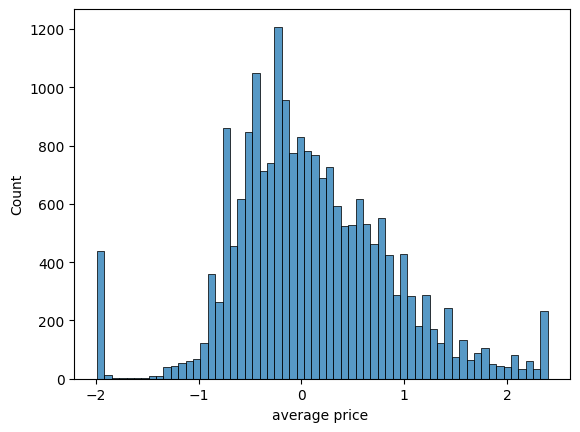

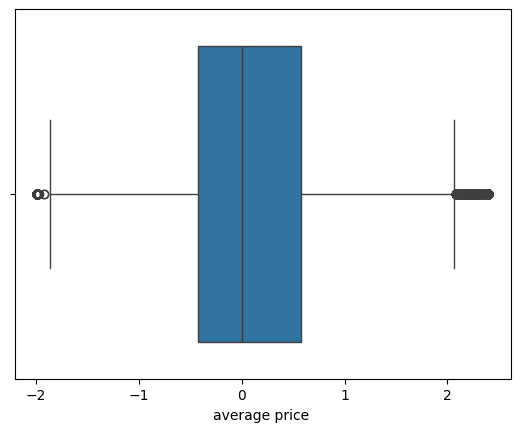

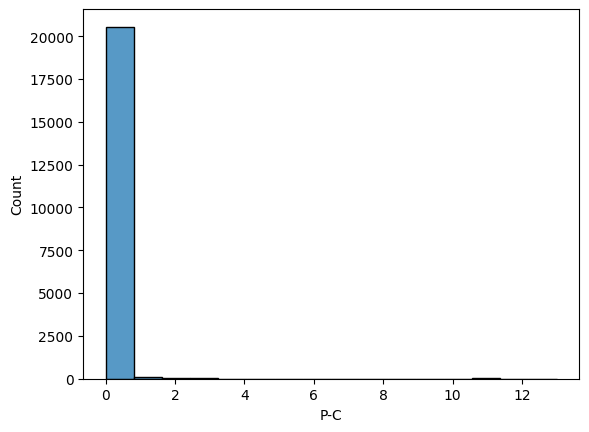

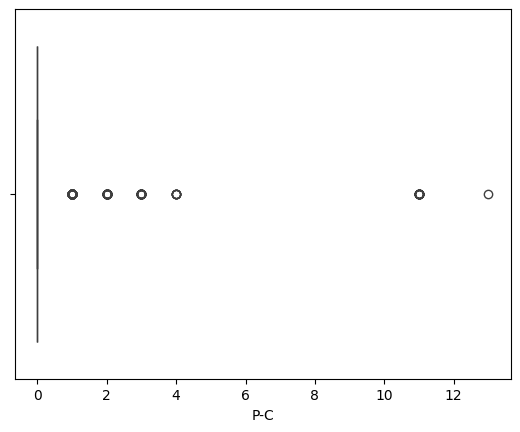

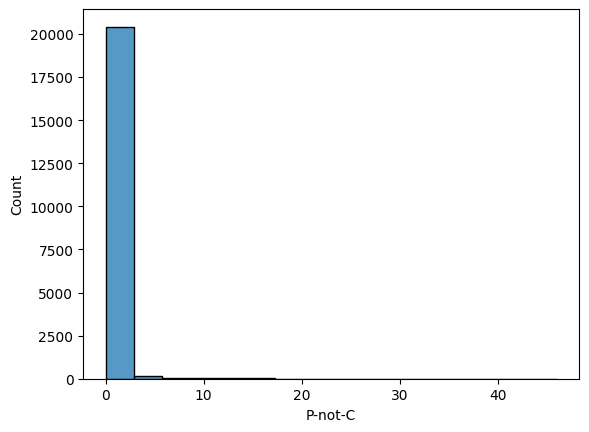

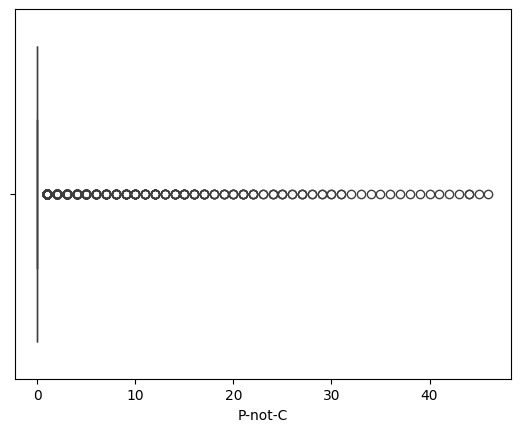

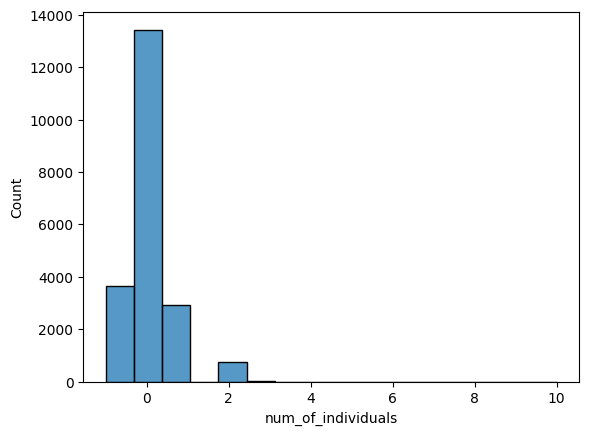

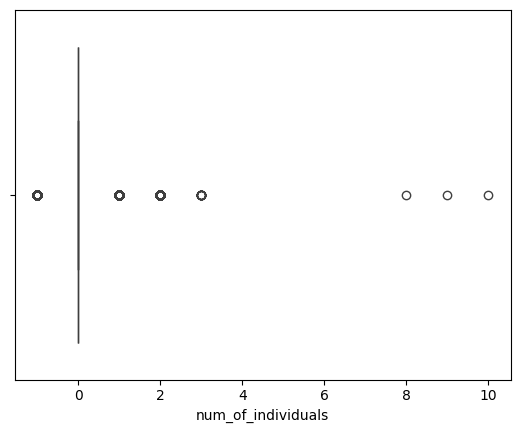

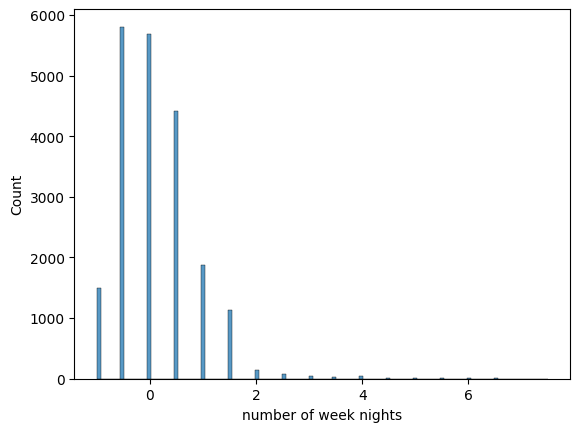

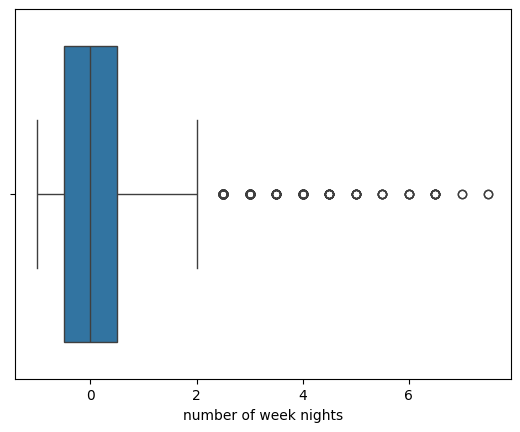

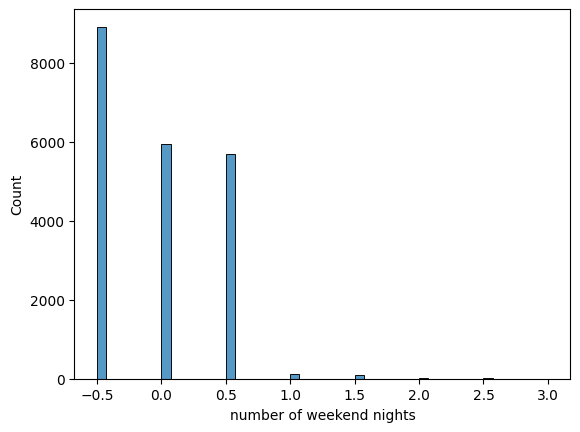

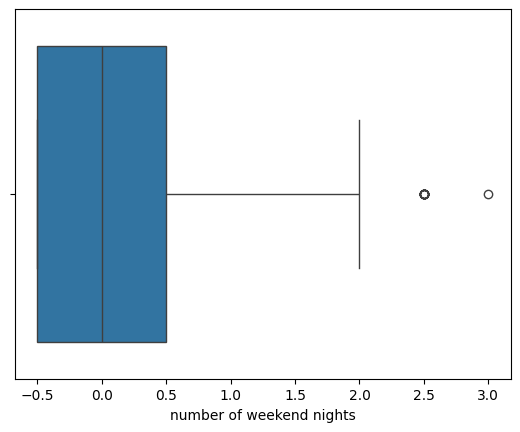

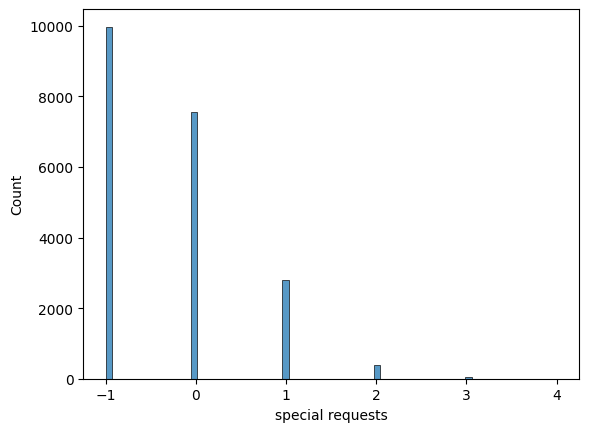

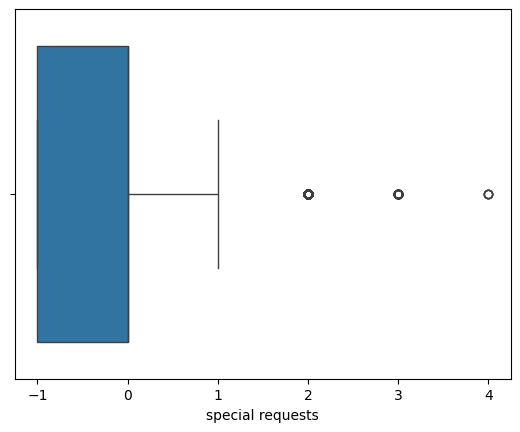

In [ ]:
x_train_scaled2 = x_train_scaled.copy()
x_test_scaled2 = x_test_scaled.copy()
standard_scaler = StandardScaler()
for column in numerical_features:
  if column in ('lead time'):
    continue
  else:
      x_train_scaled2[column] = robust_scaler.fit_transform(x_train_scaled[[column]])
      x_test_scaled2[column] = robust_scaler.transform(x_test_scaled[[column]])

      sns.histplot(x_train_scaled2[column])
      # if column in ('average price '):
        # plt.savefig("/content/drive/MyDrive/Colab Notebooks /Internship/First Project/average price Histogram after Scaling")
      plt.show()

      sns.boxplot(x = x_train_scaled2[column])
      # if column in ('average price '):
        # plt.savefig("/content/drive/MyDrive/Colab Notebooks /Internship/First Project/average price Box plot after Scaling")
      plt.show()


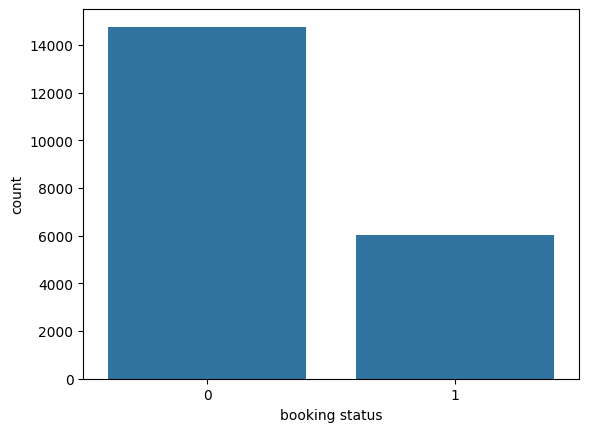

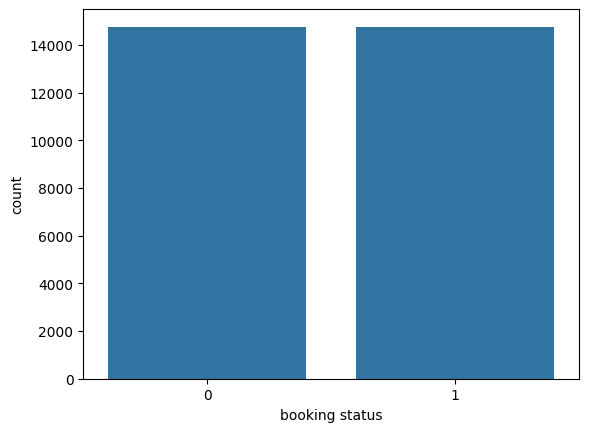

In [ ]:
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled2, y_train)
sns.countplot(data = pd.DataFrame(y_train), x = 'booking status')
plt.show()
sns.countplot(data = pd.DataFrame(y_train_resampled), x = 'booking status')
# plt.savefig("/content/drive/MyDrive/Colab Notebooks /Internship/First Project/Label After SMOTE")
plt.show()

In [ ]:
x_train_encoded2 = x_train_resampled.copy()
x_test_encoded2 = x_test_scaled2.copy()

x_train_encoded2['type of meal'] = x_train_resampled['type of meal'].replace(0, -1)
x_train_encoded2['type of meal'].unique()

x_test_encoded2['type of meal'] = x_test_scaled2['type of meal'].replace(0, -1)
print(x_train_resampled['type of meal'].unique(), '\n', x_train_encoded2['type of meal'].unique())

[1 2 0 3] 
 [ 1  2 -1  3]


In [ ]:
x_train_encoded2.isnull().sum()

,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
repeated,0
P-C,0
P-not-C,0
average price,0


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train_encoded2, y_train_resampled)

y_pred = knn.predict(x_test_encoded2)

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
F1_score = f1_score(y_pred, y_test)

print(accuracy)
print(precision)
print(recall)
print(F1_score)

0.7618864292589028
0.5087842586085735
0.5736925515055468
0.539292364990689


In [ ]:
# importances_df = pd.DataFrame({
#     'Feature': x_train_encoded2.columns,
#     'Importance': knn.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# print(importances_df)

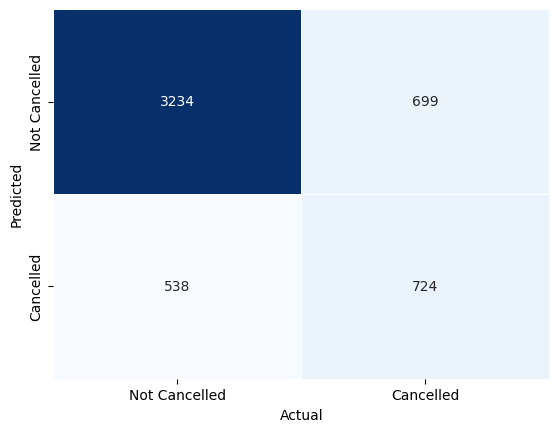

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt = 'd', cmap='Blues', xticklabels=['Not Cancelled', 'Cancelled'],
            yticklabels=['Not Cancelled', 'Cancelled'], linewidths=0.5, cbar=False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
y_test.value_counts()


,count
booking status,
0,3772
1,1423


In [ ]:
print(y_test.value_counts(), pd.DataFrame(y_pred).value_counts())


booking status
0    3772
1    1423
Name: count, dtype: int64 0
0    3933
1    1262
Name: count, dtype: int64


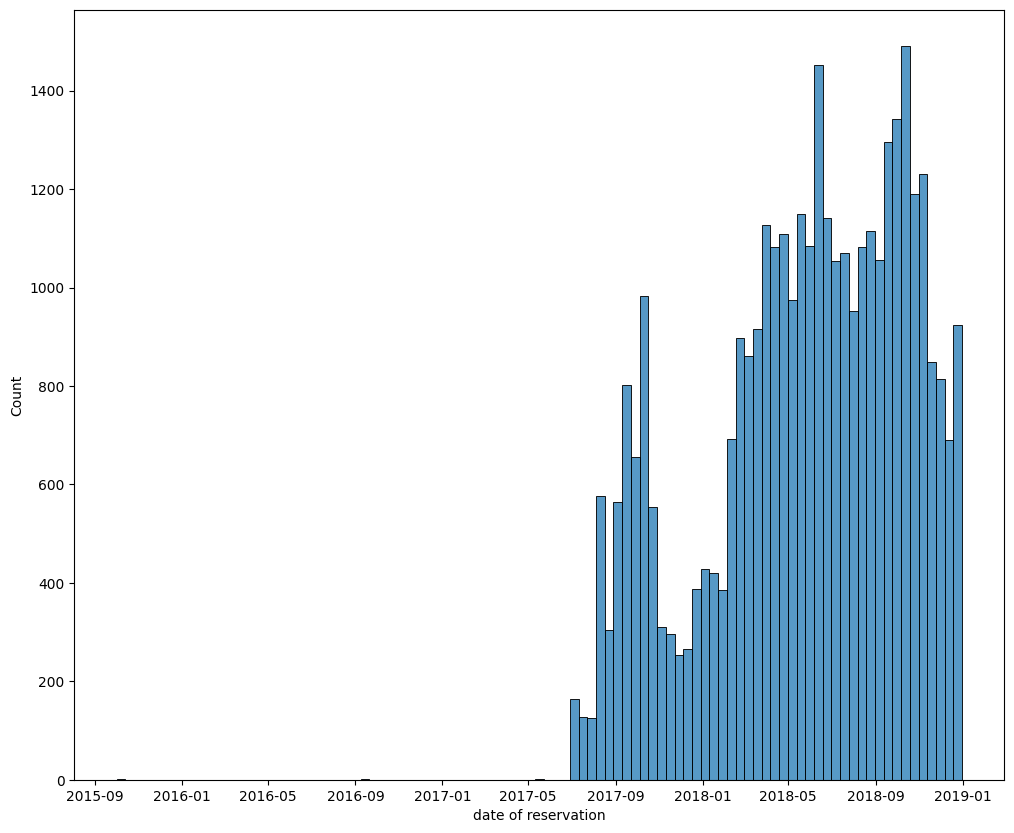

In [ ]:
plt.figure(figsize = (12, 10))
sns.histplot(df['date of reservation'])
# plt.savefig('hotogram of reservation dates')
plt.show()

In [ ]:
x_train_encoded2

,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,repeated,P-C,P-not-C,average price,special requests,num_of_individuals,month,year,day,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,0.500000,1.500000,1,0,1,1.677636,0,0.0,0.0,-0.275329,-1.000000,0.000000,10.000000,2015.0,2.0,0.0,0.0,0.0,1.0,0.0
1,-0.500000,0.000000,2,0,1,2.226720,0,0.0,0.0,-0.024650,0.000000,-1.000000,9.000000,2016.0,13.0,0.0,0.0,0.0,1.0,0.0
2,-0.500000,0.000000,1,0,1,1.606841,0,0.0,0.0,-0.024650,0.000000,-1.000000,5.000000,2017.0,20.0,0.0,0.0,0.0,0.0,1.0
3,-0.500000,1.000000,1,0,1,0.687845,0,0.0,0.0,-0.515563,0.000000,0.000000,7.000000,2017.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.500000,0.000000,2,0,1,1.844576,0,0.0,0.0,0.006685,-1.000000,0.000000,7.000000,2017.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29521,-0.500000,0.500000,1,0,1,-0.076520,0,0.0,0.0,0.596615,-1.000000,0.411587,3.000000,2018.0,24.0,0.0,0.0,0.0,0.0,1.0
29522,0.500000,-0.500000,1,0,1,1.558354,0,0.0,0.0,-0.233549,-1.000000,0.000000,5.000000,2018.0,29.0,0.0,0.0,0.0,1.0,0.0
29523,0.101697,0.000000,-1,0,1,0.334851,0,0.0,0.0,-0.429313,-0.796606,0.000000,4.000000,2018.0,1.0,0.0,0.0,0.0,0.0,1.0
29524,0.337001,0.837001,1,0,4,1.836057,0,0.0,0.0,0.292631,-1.000000,0.325998,8.674002,2018.0,11.0,0.0,0.0,0.0,0.0,1.0
